# **Step 1: Load the Dataset**

In [ ]:
import pandas as pd

# Load the Data
df = pd.read_csv("../Dataset/Cleaned_Averages.csv")



# **Step 2: Remove the Class Label**

In [8]:
X = df.drop(columns=['ترتيب_المدرسة_على_مستوى_المدارس'])

# **Step 3: Preprocess the Data (Encode + Scale)**

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
X_encoded = X.copy()
label_encoders = {}

for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column])
        label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# **Step 4: Apply KMeans Clustering**

In [11]:
from sklearn.cluster import KMeans

# Apply KMeans with initial 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Display first few rows with clusters
df.head()


,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس,Cluster
0,28,11,45,294,3,6,0,0,1.000000,1,0
1,2496,3,38,71,0,6,0,1,0.872710,1,0
2,3050,11,34,218,3,6,0,0,0.991601,2,0
3,1276,3,38,71,3,0,0,1,0.850850,2,2
4,3938,4,31,245,0,6,0,0,0.982336,3,0


# **Step 5: Evaluate Clustering (Silhouette + WCSS)**

In [12]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# WCSS (Within Cluster Sum of Squares) = Inertia
print(f"WCSS (Inertia): {kmeans.inertia_}")


Silhouette Score: 0.20575290739032373
WCSS (Inertia): 44860.303571060576


# **Step 6: Try Different Cluster Numbers (Elbow Method)**

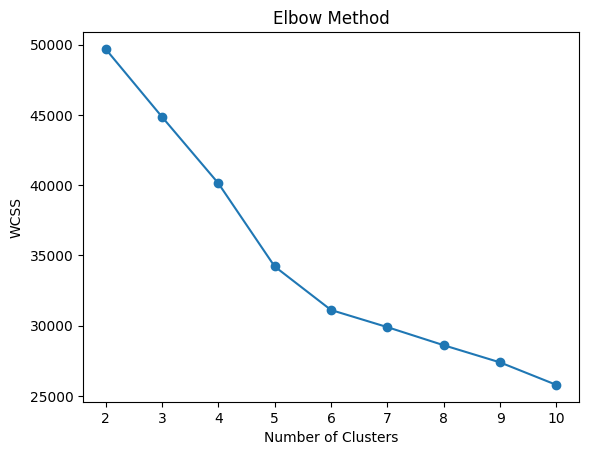

In [6]:
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


# **Step 7: How Clustering Improves Recommendations**

After applying clustering, each school is grouped based on similar characteristics.
When a user provides preferences (like gender, region, education type), we can detect
which cluster they belong to and recommend schools from the same group.
This makes the recommendation more relevant and personalized.